In [6]:
import pandas as pd
from typing import Any, Optional
import numpy as np

In [4]:
import sys
sys.path.append("./")

In [7]:
def return_none_when_is_nan(value: Any) -> Optional[Any]:
    try:
        np.isnan(value)
    except TypeError:
        return value
    
    if np.isnan(value):
        return None
    return value

In [2]:
DATASET_PATH = "./data/movie_dataset.csv"

In [3]:
movie_df = pd.read_csv(DATASET_PATH)

In [8]:
n_movie_description_words = []

for row in range(len(movie_df)):
    genres_text = None
    plot_keywords_text = None
    movie_description = None

    movie_title     = return_none_when_is_nan(movie_df.loc[row, "movie_title"])
    director_name   = return_none_when_is_nan(movie_df.loc[row, "director_name"])
    movie_imdb_link = return_none_when_is_nan(movie_df.loc[row, "movie_imdb_link"])
    content_rating  = return_none_when_is_nan(movie_df.loc[row, "content_rating"])
    genres          = return_none_when_is_nan(movie_df.loc[row, "genres"])

    if genres is not None:
        genres = genres.split("|")
        genres_text = ", ".join(genres)

    plot_keywords= return_none_when_is_nan(movie_df.loc[row, "plot_keywords"])
    if plot_keywords is not None:
        plot_keywords = plot_keywords.split("|")
        plot_keywords_text = ", ".join(plot_keywords)
        
    title_year = return_none_when_is_nan(movie_df.loc[row, "title_year"])

    if title_year is not None:
        title_year = str(int(title_year))

    if movie_title is not None:
        movie_description = f"{movie_title} is a {title_year} {genres_text} movie directed by {director_name}. Keywords: {plot_keywords_text}. Rated {content_rating}."

        n_movie_description_words.append(len(movie_description.split(" ")))

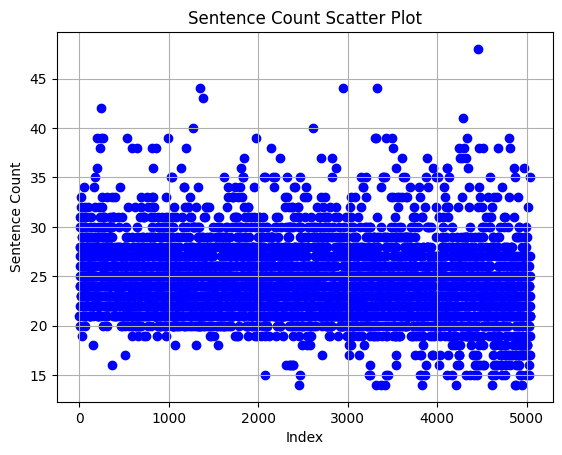

In [10]:
import matplotlib.pyplot as plt


indexes = list(range(len(n_movie_description_words)))

plt.scatter(indexes, n_movie_description_words, color='blue')
plt.title("Sentence Count Scatter Plot")
plt.xlabel("Index")
plt.ylabel("Sentence Count")
plt.grid(True)
plt.show()

In [11]:
max(n_movie_description_words)

48